# HR ANALYTICS

The aim of this notebook is to predict the Employee attrition rate based on the given features in the dataset. **Logistic Regression, Decision tree, Random Forest algorithm, Support Vector Machine and Gradient Boosting classification algorithms**  are used for prediction and the ML models are implemented using **Pipelines**. Each feature is analysed and the features that influence the attrition rate is chosen for prediction. 

## Table of contents
1. Data Gathering
2. Feature Selection
    <br>2.1 Categorical features analysis
    <br>2.2 Quantitative features analysis
3. Data Transformation
4. Maching Learning Models Implementation
5. Conclusion

# 1. DATA GATHERING

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

/kaggle/input/hr-analytics/HR_comma_sep.csv


In [2]:
#loading the dataset
retent_df = pd.read_csv('/kaggle/input/hr-analytics/HR_comma_sep.csv')
retent_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#check for null values
retent_df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# 2. FEATURE SELECTION

Categorical columns - Work_accident, Department, salary
<br>Quantitative columns - satisfaction_level, last_evaluation, number_project, average_monthly_hours, time_spend_company, promotion_last_5years

In [4]:
#analysing the correlation between features
retent_df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

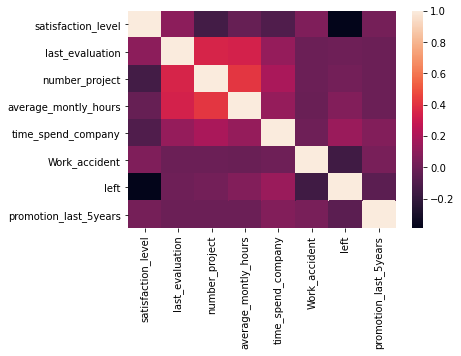

In [5]:
sns.heatmap(retent_df.corr())

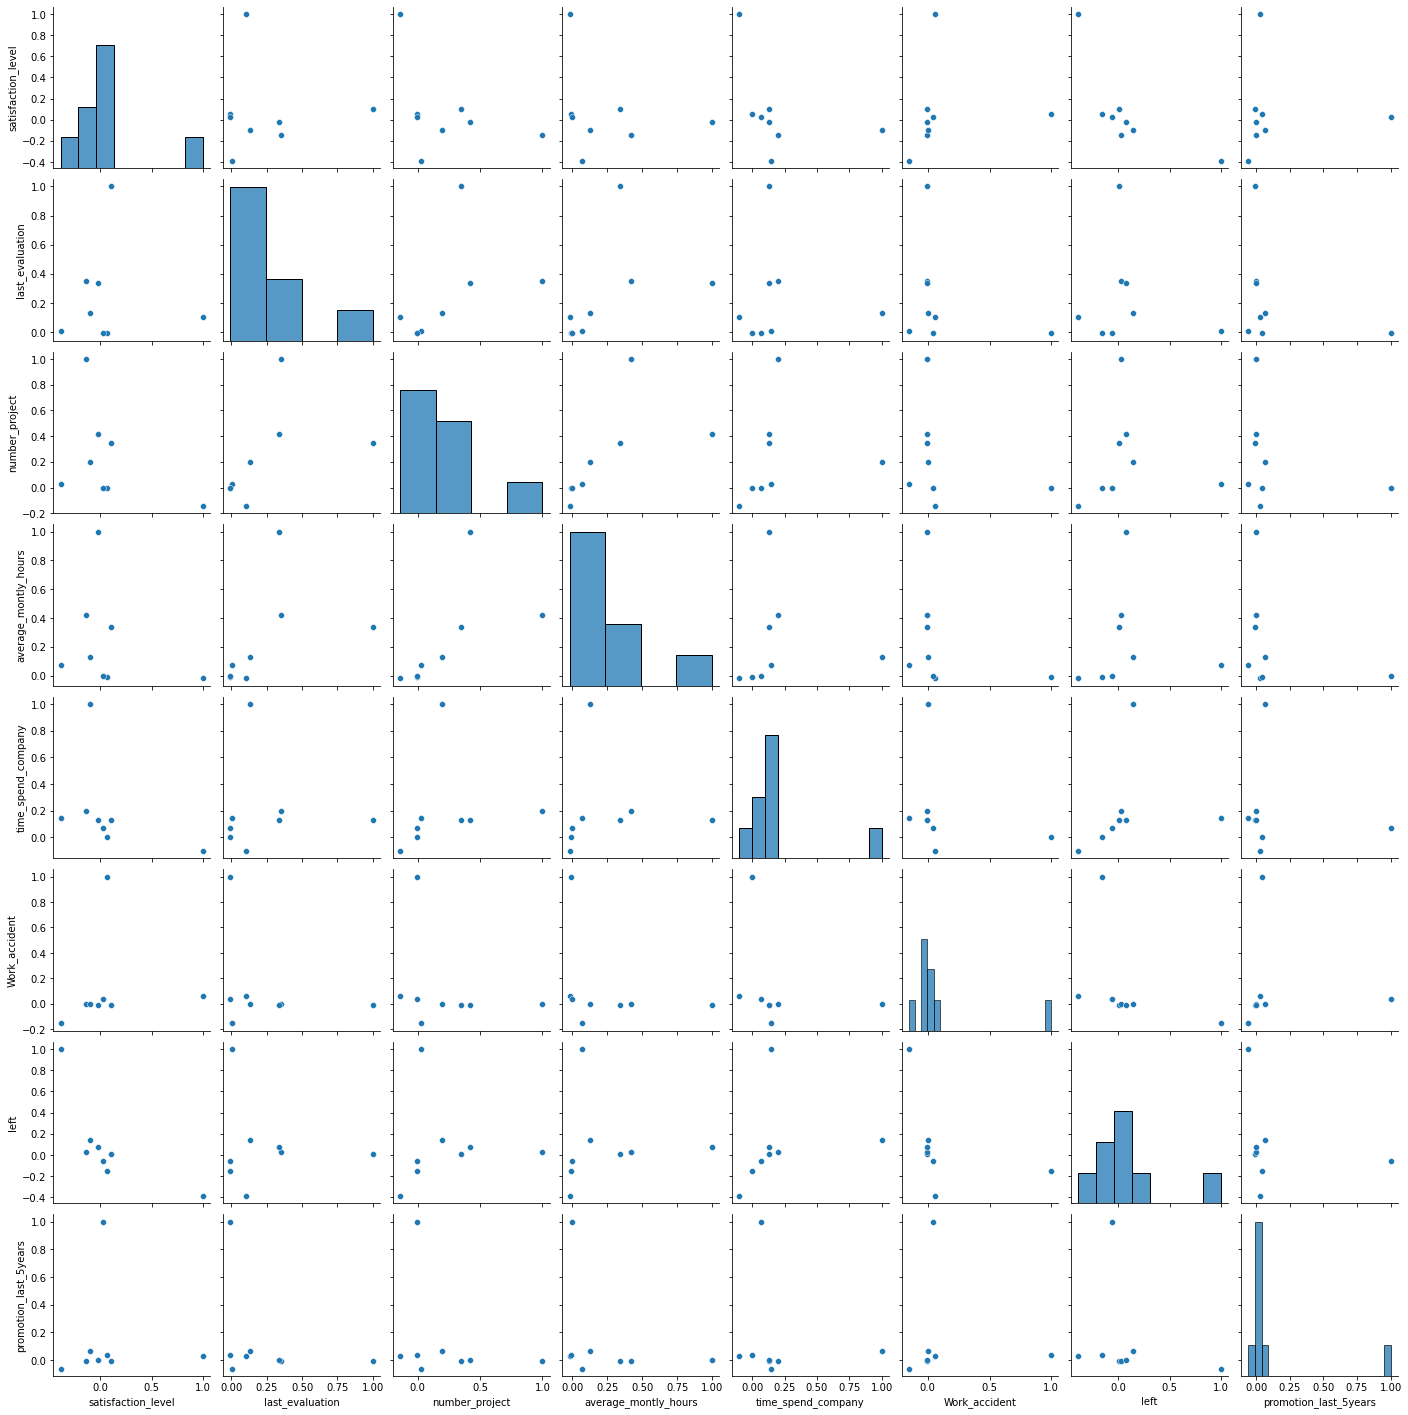

In [6]:
sns.pairplot(retent_df.corr())

In [7]:
retent_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
#checking null values
retent_df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

## 2.1 CATEGORICAL FEATURES ANALYSIS 

In [9]:
pd.crosstab(retent_df.Department, retent_df.left).style.background_gradient(cmap='summer_r')

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


From the graph, it is understood that employees from Sales Department has left the organisation in greater numbers.

Text(0.5, 1.0, 'Salary vs Employee Attrition')

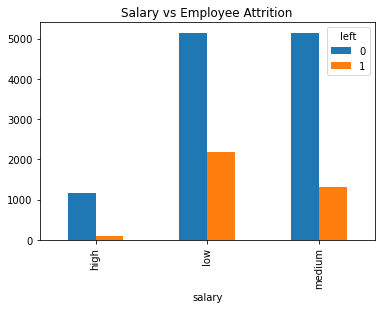

In [10]:
pd.crosstab(retent_df.salary, retent_df.left).plot(kind='bar')
plt.title('Salary vs Employee Attrition')

It seems like Low income employees has left the most from the organisation.

([<matplotlib.axis.XTick at 0x7f4345409d90>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

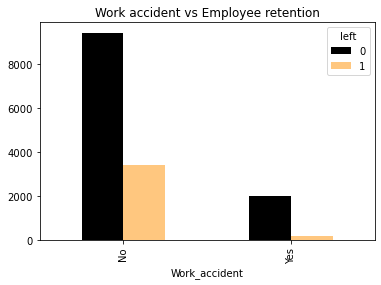

In [11]:
pd.crosstab(retent_df.Work_accident, retent_df.left).plot(kind='bar',cmap='copper')
plt.title('Work accident vs Employee retention')
plt.xticks([0,1],['No','Yes'])

Work accident does not influence Employee retention rate.

## 2.2 QUANTITATIVE FEATURES ANALYSIS 

In [12]:
retent_df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From the above table, it can be seen that satisfaction level and promotion rate is low in employees who has left the organisation. Average working hours and time spent in the company is higher for the resigned employees. These 4 features can be chosen for prediction.

([<matplotlib.axis.XTick at 0x7f4347cc0850>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

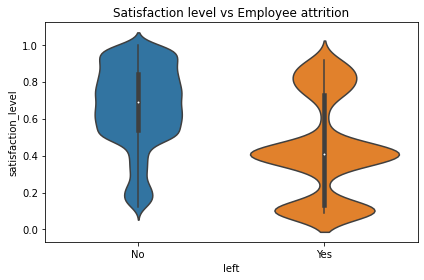

In [13]:
#satisfaction level vs employee attrition
sns.violinplot(x='left', y='satisfaction_level',data=retent_df)
plt.title('Satisfaction level vs Employee attrition')
plt.tight_layout()
plt.xticks([0,1],['No','Yes'])

It seems like the employees with lower satisfaction rate has left the most.

In [14]:
#promotion vs Employee attrition
pd.crosstab(retent_df.promotion_last_5years, retent_df.left).style.background_gradient(cmap='summer_r')

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


Employees who received no promotions has left the organisation in greater numbers.

In [15]:
retent_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

([<matplotlib.axis.XTick at 0x7f434537a290>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

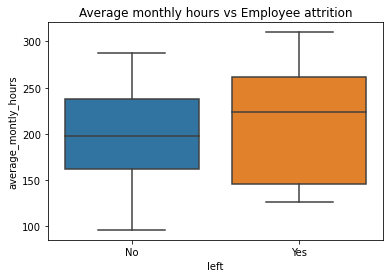

In [16]:
sns.boxplot(x='left', y='average_montly_hours', data=retent_df)
plt.title('Average monthly hours vs Employee attrition')
plt.xticks([0,1],['No','Yes'])

Employees who spent more time in working has left in greater numbers.

([<matplotlib.axis.XTick at 0x7f43452979d0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

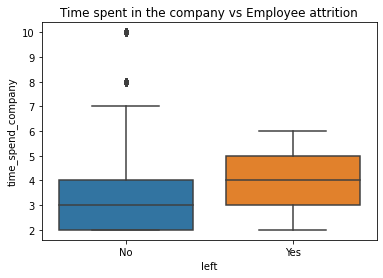

In [17]:
#Time spent in the company vs Employee attrition
sns.boxplot(x='left', y='time_spend_company', data=retent_df)
plt.title('Time spent in the company vs Employee attrition')
plt.xticks([0,1],['No','Yes'])

Thus, it is safe to conclude that Department, Salary, satisfaction level, promotion, average working hours in a month and time spent in the company influences the Employee attrition rate. Hence these features are chosen for prediction.

# 3. DATA TRANSFORMATION

In [18]:
#save the 6 features selected from feature analysis in a separate dataframe
df = retent_df[['Department','salary','satisfaction_level','promotion_last_5years','average_montly_hours','time_spend_company']]
df.head()

,Department,salary,satisfaction_level,promotion_last_5years,average_montly_hours,time_spend_company
0,sales,low,0.38,0,157,3
1,sales,medium,0.80,0,262,6
2,sales,medium,0.11,0,272,4
3,sales,low,0.72,0,223,5
4,sales,low,0.37,0,159,3


In [19]:
#transform the data to numerical so that it can be passed to the model
salary_df = pd.get_dummies(df.salary, prefix='salary')
salary_df

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [20]:
#transform department
dept_df = pd.get_dummies(df.Department, prefix='dept')
dept_df.head()

,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [21]:
#concatenate salary with the main dataframe
transform_df = pd.concat([df,salary_df], axis='columns')
transform_df.head()

,Department,salary,satisfaction_level,promotion_last_5years,average_montly_hours,time_spend_company,salary_high,salary_low,salary_medium
0,sales,low,0.38,0,157,3,0,1,0
1,sales,medium,0.80,0,262,6,0,0,1
2,sales,medium,0.11,0,272,4,0,0,1
3,sales,low,0.72,0,223,5,0,1,0
4,sales,low,0.37,0,159,3,0,1,0


In [22]:
#concatenate Department with the main dataframe
transform_df = pd.concat([transform_df,dept_df], axis='columns')
transform_df.head()

,Department,salary,satisfaction_level,promotion_last_5years,average_montly_hours,time_spend_company,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,sales,low,0.38,0,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,sales,medium,0.80,0,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,sales,medium,0.11,0,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,sales,low,0.72,0,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,sales,low,0.37,0,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [23]:
#drop columns Department and salary
transform_df.drop(['Department','salary'], axis=1, inplace=True)
transform_df.head()

,satisfaction_level,promotion_last_5years,average_montly_hours,time_spend_company,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


# 4. MACHINE LEARNING MODELS IMPLEMENTATION

In [24]:
#split the dataset into training and test data
x_train, x_test, y_train, y_test = train_test_split(transform_df, retent_df.left, test_size=0.2)

In [25]:
#create a pipeline for Logistic Regression
pipeline_log_reg = Pipeline([('Logistic Regression',LogisticRegression(solver='lbfgs', max_iter=1000))])

#create a pipeline for decision tree
pipeline_dec_tree = Pipeline([('Decision tree', DecisionTreeClassifier())])

#create a pipeline for Random Forest Classifier
pipeline_random_forest = Pipeline([('Random Forest', RandomForestClassifier())])

#create a pipeline for Support Vector Machine
pipeline_svm = Pipeline([('Support Vector Machine', SVC(C=2.0))])

#create a pipeline for Gradient Boosting Classifier
pipeline_gradient_boost = Pipeline([('Gradient Boosting Classifier', GradientBoostingClassifier(learning_rate=0.1))])

In [26]:
#create a list and dictionary for pipelines
pipelines = [pipeline_log_reg, pipeline_dec_tree, pipeline_random_forest, pipeline_svm, pipeline_gradient_boost]
pipelines_dict = {0:'Logistic Regression',
                 1:'Decision Tree',
                 2:'Random Forest',
                 3:'Support Vector Machine',
                 4:'Gradient Boosting Classifier'}

In [27]:
#predict and display the accuracy of models
for i,pipe in enumerate(pipelines):
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    print("Accuracy of {} is {}".format(pipelines_dict[i], pipe.score(x_test, y_test)))

Accuracy of Logistic Regression is 0.7583333333333333
Accuracy of Decision Tree is 0.9656666666666667
Accuracy of Random Forest is 0.9826666666666667
Accuracy of Support Vector Machine is 0.764
Accuracy of Gradient Boosting Classifier is 0.9616666666666667


# 5. CONCLUSION

From the analysis and prediction, the accuracy of the models are listed as follows:
<br>Logistic Regression - 77%
<br>Decision Tree algorithm - 97% 
<br>Random Forest algorithm - 98% 
<br>Support Vector machine - 78%
<br>Gradient Boosting Classifier - 96%